In [38]:
import pandas as pd
import seaborn as sns
import numpy as np
import time
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
path = 'C:/Users/LEGION/Documents/Programism/Testovoe_Taras/Data.csv'
df = pd.read_csv(path)

In [39]:
#Сorrectly reflect the number of purchases
df['total_renewals'] = df['total_renewals'] + 1
df['total_renewals'] = df['total_renewals'].fillna(1)

In [40]:
df['last_seen_at'] = pd.to_datetime(df['last_seen_at'],unit='ms')
df['first_purchase_at'] = pd.to_datetime(df['first_purchase_at'],unit='ms')

In [41]:
df['LT'] = df['last_seen_at'] - df['first_purchase_at']
df['LT'] = (df['LT'] / np.timedelta64(1,'M')).astype(int)
df.sort_values(by = ['LT'], ascending = False)

,first_seen_at,last_seen_at,ip_country,media_source,app_name,latest_product,first_purchase_at,trial_start_at,trial_end_at,most_recent_purchase_at,...,total_renewals,total_spent,latest_store,latest_auto_renew_intent,all_purchased_product_ids,most_recent_billing_issues_at,status,has_made_a_non_subscription_purchase,app_user_id,LT
561,1622129723454,2021-08-01 20:10:43.878,US,Source D,Generic App,com.app.year,2020-03-28 23:25:34,1.585438e+12,1.585697e+12,1617233134000,...,2.0,139.98,app_store,f,com.app.year,NaN,cancelled,f,5DFED47F-BE02-4FC5-B1FA-73DF307A176D,16
395,1628208795290,2021-08-06 00:13:15.290,US,Source D,Generic App,com.app.year,2020-04-03 16:26:13,1.585931e+12,1.586190e+12,1585931173000,...,1.0,0.00,app_store,f,com.app.year,NaN,expired,f,3EA484B0-843B-41A5-B135-DF9A16E866C6,16
413,1620040669947,2021-08-05 14:00:00.161,IN,Source C,Generic App,com.app.year,2020-04-02 04:56:10,1.585803e+12,1.586063e+12,1585803370000,...,1.0,0.00,app_store,f,com.app.year,NaN,expired,f,5A0B9707-1975-4C96-BB88-B08A1E636521,16
794,1627400182133,2021-07-27 15:36:22.133,US,Source D,Generic App,com.app.year,2020-03-25 06:04:09,1.585116e+12,1.585375e+12,1585375449000,...,1.0,69.99,app_store,f,com.app.year,NaN,expired,f,D679D1AE-C9E8-4E84-A1B5-18404EC52003,16
70,1621602060929,2021-08-14 10:50:49.057,US,Source X,Generic App,com.app.week,2020-03-24 03:19:22,1.585020e+12,1.585279e+12,1628963824000,...,2.0,13.98,app_store,t,com.app.week,NaN,active,f,886E0CEF-1E18-483A-A978-73FF96AD1F55,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5453,1622757239774,2021-06-03 21:53:59.774,US,NaN,Generic App,com.app.year,2021-06-03 21:55:25,1.622757e+12,1.623017e+12,1623016525000,...,1.0,69.99,app_store,t,com.app.year,NaN,active,f,BF5F19CA-63A2-431B-A191-A334DAE96D47,0
5452,1622512163630,2021-06-03 21:58:48.158,US,Source F,Generic App,com.app.year,2021-06-01 01:50:00,1.622512e+12,1.622771e+12,1622771400000,...,1.0,69.99,app_store,t,com.app.year,NaN,active,f,16950286-6B8F-46B7-A3DA-61D74566C8E1,0
5447,1622598952286,2021-06-03 22:34:38.961,US,Source D,Generic App,com.app.year,2021-06-03 22:35:06,1.622760e+12,1.623019e+12,1622759706000,...,1.0,0.00,app_store,f,com.app.year,NaN,expired,f,53756458-3003-48AB-8507-9DA84619704D,0
11996,1618955794350,2021-04-20 21:56:34.351,US,NaN,Generic App,com.app.year,2021-04-20 21:58:51,1.618956e+12,1.619215e+12,1618955931000,...,1.0,0.00,app_store,f,com.app.year,NaN,expired,f,1C28C29F-AA5F-443D-98DA-CE836AB9BE76,0


In [42]:
sourse = round(df.groupby('media_source', as_index = False).agg({'LT' : 'mean'}), 2)
sourse

,media_source,LT
0,Source A,2.63
1,Source B,0.06
2,Source C,11.00
3,Source D,3.31
4,Source E,3.61
5,Source F,1.00
6,Source G,5.74
7,Source H,8.71
8,Source I,10.73
9,Source J,9.87


In [43]:
#Count number of purchases
sourse_sum_purch = df.groupby(['media_source'], as_index = False).agg({'total_renewals' : 'sum'}) \
                                                                 .sort_values(by=['total_renewals'], ascending = False)
sourse_sum_purch.head()

,media_source,total_renewals
14,Source X,3729.0
3,Source D,3518.0
5,Source F,2152.0
0,Source A,1954.0
2,Source C,1088.0


In [56]:
#Count repeatp purchases
sourse_repeat_purch = df.groupby(['media_source'], as_index = False).agg({'total_renewals' : 'mean'})
sourse_repeat_purch = round(sourse_repeat_purch.rename(columns={'total_renewals': 'porvt_purch'}), 2)
sourse_repeat_purch.head(5)

,media_source,porvt_purch
0,Source A,1.10
1,Source B,1.00
2,Source C,1.86
3,Source D,1.14
4,Source E,1.29


In [57]:
#Count Revenue
sourse_revenue = df.groupby(['media_source'], as_index = False).agg({'total_spent' : 'sum'}) \
                                                               .sort_values(by = ['total_spent'], ascending = False)
sourse_revenue = round(sourse_revenue.rename(columns={'total_spent': 'revenue'}), 2)
sourse_revenue.head()

,media_source,revenue
3,Source D,162574.25
0,Source A,78666.43
5,Source F,66039.56
2,Source C,57863.69
14,Source X,45078.03


In [58]:
#Count users
count_users = df.groupby(['media_source'], as_index = False).agg({'app_user_id' : 'count'}) \
                                                                 .sort_values(by=['app_user_id'], ascending = False)
count_users = count_users.rename(columns={'app_user_id' : 'users_count'})
count_users.head()

,media_source,users_count
3,Source D,3086
5,Source F,2118
0,Source A,1776
14,Source X,750
2,Source C,586


In [47]:
#Count clients
customer_df = df.query('total_spent > 0')
customer_count = customer_df.groupby(['media_source'], as_index = False).agg({'app_user_id' : 'count'}) \
                                                                 .sort_values(by=['app_user_id'], ascending = False)
customer_count = customer_count.rename(columns={'app_user_id' : 'customer_count'})
customer_count

,media_source,customer_count
3,Source D,2042
0,Source A,1032
5,Source F,930
2,Source C,505
13,Source X,470
4,Source E,110
8,Source I,56
6,Source G,52
10,Source K,38
7,Source H,19


In [60]:
#Join our dataframes in one
sourse_merged = sourse.merge(sourse_repeat_purch, on = 'media_source')
sourse_merged = sourse_merged.merge(sourse_sum_purch, on = 'media_source')
sourse_merged = sourse_merged.sort_values(by = 'total_renewals', ascending = False)
sourse_merged = sourse_merged.merge(sourse_revenue, on = 'media_source')
sourse_merged = sourse_merged.merge(count_users, on = 'media_source')
sourse_merged = sourse_merged.merge(customer_count, on = 'media_source')
sourse_merged.head(5)

,media_source,LT,porvt_purch,total_renewals,revenue,users_count,customer_count
0,Source X,3.19,4.97,3729.0,45078.03,750,470
1,Source D,3.31,1.14,3518.0,162574.25,3086,2042
2,Source F,1.00,1.02,2152.0,66039.56,2118,930
3,Source A,2.63,1.10,1954.0,78666.43,1776,1032
4,Source C,11.00,1.86,1088.0,57863.69,586,505


In [61]:
#Count average check
sourse_merged['avg_check'] = round(sourse_merged['revenue'] / sourse_merged['total_renewals'], 2)
sourse_merged.head()

,media_source,LT,porvt_purch,total_renewals,revenue,users_count,customer_count,avg_check
0,Source X,3.19,4.97,3729.0,45078.03,750,470,12.09
1,Source D,3.31,1.14,3518.0,162574.25,3086,2042,46.21
2,Source F,1.00,1.02,2152.0,66039.56,2118,930,30.69
3,Source A,2.63,1.10,1954.0,78666.43,1776,1032,40.26
4,Source C,11.00,1.86,1088.0,57863.69,586,505,53.18


In [62]:
#Count CR (convertion rate)
sourse_merged['CR'] = round(sourse_merged['customer_count'] / sourse_merged['users_count'], 2)
sourse_merged.head()

,media_source,LT,porvt_purch,total_renewals,revenue,users_count,customer_count,avg_check,CR
0,Source X,3.19,4.97,3729.0,45078.03,750,470,12.09,0.63
1,Source D,3.31,1.14,3518.0,162574.25,3086,2042,46.21,0.66
2,Source F,1.00,1.02,2152.0,66039.56,2118,930,30.69,0.44
3,Source A,2.63,1.10,1954.0,78666.43,1776,1032,40.26,0.58
4,Source C,11.00,1.86,1088.0,57863.69,586,505,53.18,0.86


In [63]:
#Count ARPU
sourse_merged['ARPPU'] = round(sourse_merged['porvt_purch'] * sourse_merged['avg_check'] ,2)
sourse_merged.head()

,media_source,LT,porvt_purch,total_renewals,revenue,users_count,customer_count,avg_check,CR,ARPPU
0,Source X,3.19,4.97,3729.0,45078.03,750,470,12.09,0.63,60.09
1,Source D,3.31,1.14,3518.0,162574.25,3086,2042,46.21,0.66,52.68
2,Source F,1.00,1.02,2152.0,66039.56,2118,930,30.69,0.44,31.30
3,Source A,2.63,1.10,1954.0,78666.43,1776,1032,40.26,0.58,44.29
4,Source C,11.00,1.86,1088.0,57863.69,586,505,53.18,0.86,98.91


In [64]:
sourse_merged['ARPU'] = round(sourse_merged['ARPPU'] * sourse_merged['CR'] ,2)
sourse_merged.head()

,media_source,LT,porvt_purch,total_renewals,revenue,users_count,customer_count,avg_check,CR,ARPPU,ARPU
0,Source X,3.19,4.97,3729.0,45078.03,750,470,12.09,0.63,60.09,37.86
1,Source D,3.31,1.14,3518.0,162574.25,3086,2042,46.21,0.66,52.68,34.77
2,Source F,1.00,1.02,2152.0,66039.56,2118,930,30.69,0.44,31.30,13.77
3,Source A,2.63,1.10,1954.0,78666.43,1776,1032,40.26,0.58,44.29,25.69
4,Source C,11.00,1.86,1088.0,57863.69,586,505,53.18,0.86,98.91,85.06


In [65]:
top_10 = sourse_merged.sort_values(by = ('ARPU'), ascending = False).head(10)

<AxesSubplot:xlabel='ARPU', ylabel='media_source'>

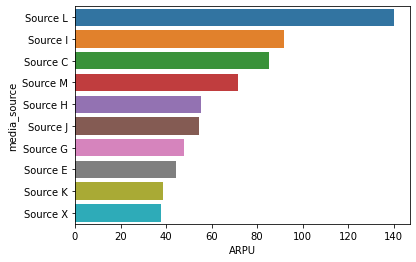

In [54]:
sns.barplot(x="ARPU", y="media_source", data=top_10)

<AxesSubplot:xlabel='ARPU', ylabel='media_source'>

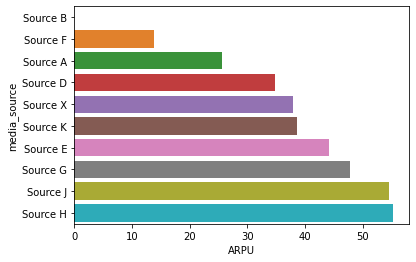

In [55]:
top_lowest_10 = sourse_merged.sort_values(by = ('ARPU'), ascending = True).head(10)

sns.barplot(x="ARPU", y="media_source", data=top_lowest_10)

C:\Users\LEGION\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ARPU', ylabel='Density'>

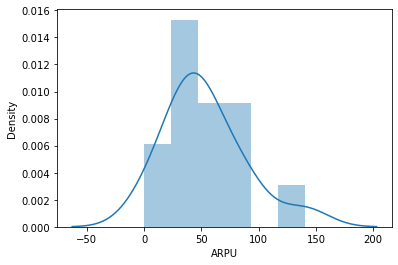

In [66]:
sns.distplot(sourse_merged['ARPU'])